### Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

#### Описание данных
    •    Name — название игры
    •    Platform — платформа
    •    Year_of_Release — год выпуска
    •    Genre — жанр игры
    •    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    •    EU_sales — продажи в Европе (миллионы проданных копий)
    •    JP_sales — продажи в Японии (миллионы проданных копий)
    •    Other_sales — продажи в других странах (миллионы проданных копий)
    •    Critic_Score — оценка критиков (максимум 100)
    •    User_Score — оценка пользователей (максимум 10)
    •    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

## Шаг 1. Изучение данных из файла

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np 
import matplotlib.pyplot as plt 

from scipy import stats as st
from urllib.request import urlretrieve
from pathlib import Path

In [ ]:
data_games = pd.read_csv('/datasets/games.csv', sep=',')
data_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
data_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод
Изучили основную информацию о датасете. 

Пропуски в столбце year_of_release. Возможно, игры не вышли в релиз на момент выгрузки датасета. Также неверный формат данных.

Множество пропусков в столбцах оценок от критиков и игроков: critic_score и user_score.

В столбце оценок от игроков user_score присутствуют значения tbd, что означают to be determined (будет определено). Скорее всего, игроки еще не дали своих оценок данным играм на тот момент.

## Шаг 2. Предобработка данных

##### •	Заменим названия столбцов (приведем к нижнему регистру);

In [ ]:
data_games.columns = data_games.columns.str.lower()
data_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


##### •	Преобразуем данные в нужные типы. 

In [ ]:
data_games.drop(data_games[data_games['year_of_release'].isna()].index,inplace=True)
data_games['year_of_release'] = pd.to_numeric(data_games['year_of_release'], downcast='integer')

В столбце user_score есть значения tbd (to be determined). Поменяем его на nan

In [ ]:
tbd = data_games['user_score'] != 'tbd'
data_games['user_score'].where(tbd, np.nan, inplace=True)
data_games['user_score'] = data_games['user_score'].astype('float64')
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int16
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int16(1), object(4)
memory usage: 1.4+ MB


##### •	Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [ ]:
data_games['world_sales'] = (data_games['na_sales'] + data_games['eu_sales'] 
                             + data_games['jp_sales'] + data_games['other_sales'])
data_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### Вывод
Слишком большое количество пропущенных данных в столбцах оценок критиков и игроков. Если заполнить их, то они сильно повлияют на распределения в дальнейшем. Предлагаю пока оставить.

В столбце user_score есть значения tbd (to be determined). Поменяли его на nan.

Данные в столбце года релиза должны быть целочисленными.

Данные в столбце оценок от пользователей должны быть числами с плавающей точкой, так как оценки исчисляются средним.

Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

## Шаг 3. Исследовательский анализ данных

##### •	Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

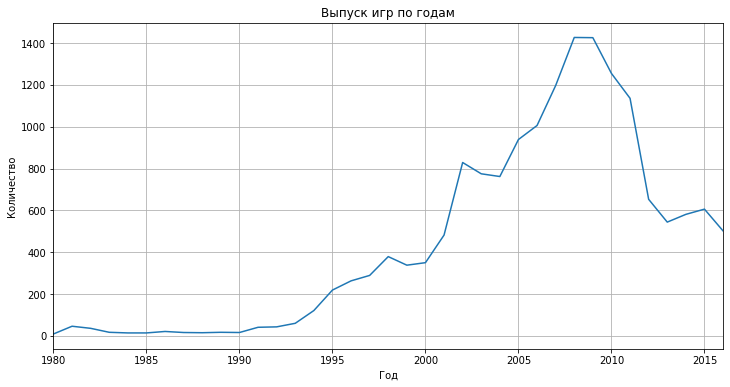

In [ ]:
games_year_release = pd.pivot_table(data_games, index='year_of_release', values='name', aggfunc='count')

games_year_release.plot(figsize=(12, 6), legend=False, grid=True, title='Выпуск игр по годам').set(xlabel='Год', ylabel='Количество')
plt.show()

Период до 1993 года выпускается довольно мало игр. Рост в релизах игр наступает в 1993 году - и после него начинается бум. В 2008 наступает переломный момент и до 2013 года релизы падают в 2 раза и до 2016 держатся примерно на одном уровне.

С 1980 годов по 1993 было мало компаний и маленкий охват игроков.

В 2000 году видно, что выпустилось много игр. Это означает что с 1997 по 2002 появились новые возможности для создания реалистичных игр и новые средства программирования.

Спад индустри игр с 2013 по 2016 обусловлен экономическим кризисом и требованиям к игре. Крупные студии создают игры по 10-12 лет.

##### •	Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [ ]:
platform_sales_pivot_table = pd.pivot_table(data_games, index=['platform'], values=['world_sales'], aggfunc='sum')
platform_sales_pivot_table = platform_sales_pivot_table.sort_values('world_sales',ascending=False)
platform_sales_pivot_table

,world_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Возьмем первые 6 платформ, как самые популярные

In [ ]:
top_6_platforms = platform_sales_pivot_table.head(6)
top_6_platforms

,world_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


In [ ]:
filled_year = data_games[pd.notnull(data_games['year_of_release'])]

def fill_year(row, **col):
    rows = filled_year[filled_year['name'] == row['name']]

    if len(rows) > 0:
        return rows.iloc[0]['year_of_release']
    return row['year_of_release']

data_games['year_of_release'] = data_games.apply(fill_year, axis=1)
data_games['year_of_release'].isnull().sum()

0

In [ ]:
def year_total_sale_for_platform(name, data_games):
    return (data_games.query('platform == @name').pivot_table(index='year_of_release', values='world_sales', aggfunc='sum')
    .sort_values('year_of_release'))

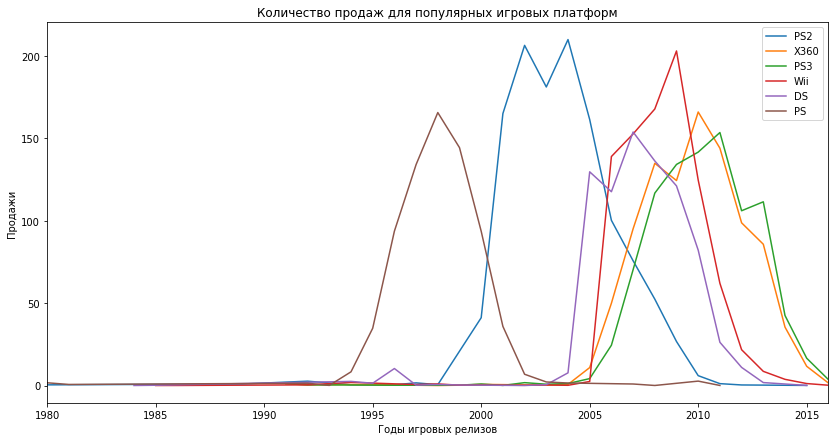

In [ ]:
for i in list(top_6_platforms.index):
    year_total_sale_for_platform(i, data_games)['world_sales'].plot(figsize=(14, 7), label=i, title='Количество продаж для популярных игровых платформ').set(xlabel='Годы игровых релизов', ylabel='Продажи')
    plt.legend()

#### Вывод: Из графика видно, что срок активного существования платформ 9-10 лет, и распределение продаж идет близко к нормальному распределению, поэтому будем считать, что средний срок  существования платформы - 10-12 лет. 

Актуальным периодом по продажам будем считать с 2013 по 2016 год.

In [ ]:
relevant_games = data_games.query('year_of_release > 2012')
relevant_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2013,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


###### •	Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

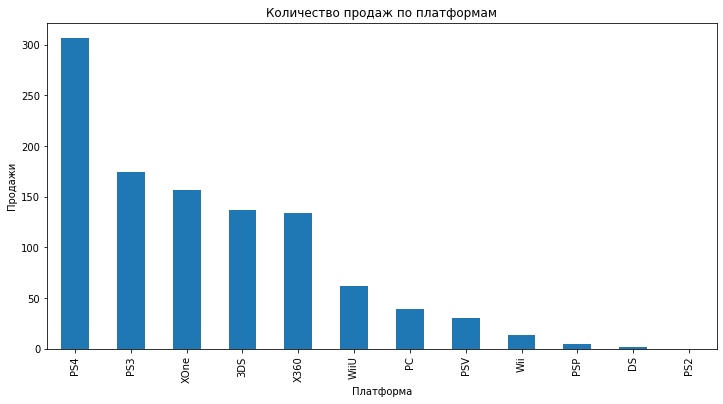

In [ ]:
profitable_platform = relevant_games.pivot_table(index='platform', values='world_sales', aggfunc='sum').sort_values('world_sales', ascending=False)

profitable_platform.plot(kind='bar', y='world_sales', legend=False, title='Количество продаж по платформам', figsize=(12, 6)).set(xlabel='Платформа',ylabel='Продажи')
plt.show()

<div class="alert alert-info">
<font size="5"><b>Вывод</b></font> 
    
Из графика видно, что самые популярные игровые платформы за весь период это PS4, PS3, XOne, 3DS, X360. Принадлежат Sony и Microsoft.
    
    
    
</div>

###### Возьмем 5 самых продаваемых платформ

In [ ]:
profitable_platform.head()

,world_sales
platform,
PS4,306.64
PS3,173.98
XOne,157.04
3DS,136.88
X360,134.24


Топ 5 платформ по миру: PS4, PS3, XOne, 3DS и X360.

count    373.000000
mean       0.822091
std        1.644046
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: world_sales, dtype: float64

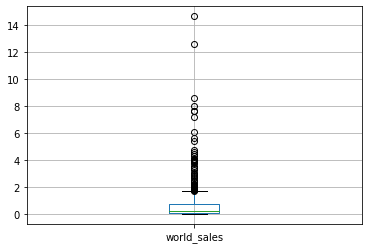

In [ ]:
games_sales_ps4 = relevant_games.query('platform =="PS4"')
games_sales_ps4.boxplot(column = 'world_sales')
games_sales_ps4['world_sales'].describe()

count    334.000000
mean       0.520898
std        1.470204
min        0.010000
25%        0.050000
50%        0.145000
75%        0.457500
max       21.050000
Name: world_sales, dtype: float64

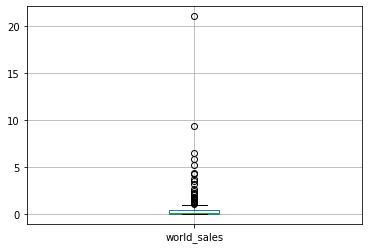

In [ ]:
games_sales_ps3 = relevant_games.query('platform =="PS3"')
games_sales_ps3.boxplot(column = 'world_sales')
games_sales_ps3['world_sales'].describe()

count    234.000000
mean       0.671111
std        1.057089
min        0.010000
25%        0.060000
50%        0.240000
75%        0.737500
max        7.390000
Name: world_sales, dtype: float64

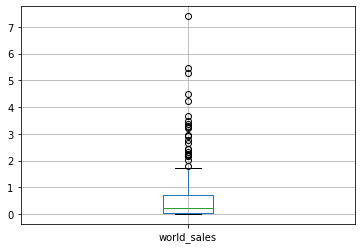

In [ ]:
games_sales_x_one = relevant_games.query('platform =="XOne"')
games_sales_x_one.boxplot(column = 'world_sales')
games_sales_x_one['world_sales'].describe()

count    288.000000
mean       0.475278
std        1.411015
min        0.010000
25%        0.040000
50%        0.090000
75%        0.272500
max       14.600000
Name: world_sales, dtype: float64

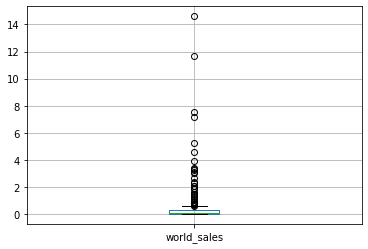

In [ ]:
games_sales_3ds = relevant_games.query('platform =="3DS"')
games_sales_3ds.boxplot(column = 'world_sales')
games_sales_3ds['world_sales'].describe()

count    183.000000
mean       0.733552
std        1.676471
min        0.010000
25%        0.080000
50%        0.250000
75%        0.790000
max       16.270000
Name: world_sales, dtype: float64

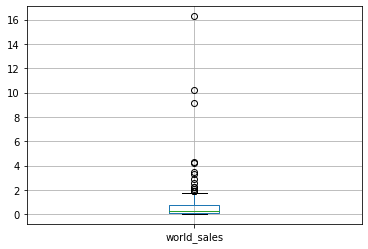

In [ ]:
games_sales_x360 = relevant_games.query('platform =="X360"')
games_sales_x360.boxplot(column = 'world_sales')
games_sales_x360['world_sales'].describe()

Для PS4, PS3 и 3DS видна положительная тенденция к росту продаж. Средняя больше 3го квантиля, это означает, что эти платформы делаются более популярные, а игры продаваемыми, чем на XOne и X360.

<div class="alert alert-info">
<font size="5"><b></b></font> 
    
Продажи растут, т.к. производители заменяют предыдущее поколение игровых приставок.
    
    
    
</div>

##### •	Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [ ]:
ps4_sales_crit_user_rating = games_sales_ps4.loc[:,['world_sales', 'critic_score', 'user_score']]
ps4_sales_crit_user_rating.head()

,world_sales,critic_score,user_score
31,14.63,NaN,NaN
42,12.62,97.0,8.3
77,8.58,82.0,4.3
87,7.98,NaN,NaN
92,7.66,83.0,5.7


In [ ]:
ps4_sales_crit_user_rating.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.408963,-0.032188
critic_score,0.408963,1.000000,0.560715
user_score,-0.032188,0.560715,1.000000


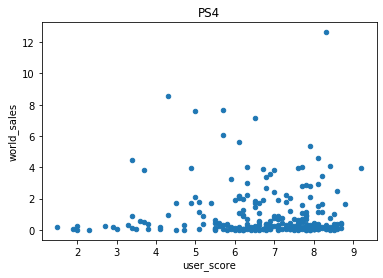

In [ ]:
ps4_sales_crit_user_rating.plot(x='user_score', y='world_sales', kind='scatter', title='PS4')
plt.show()

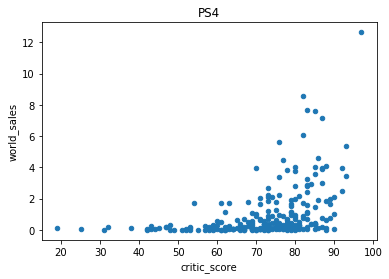

In [ ]:
ps4_sales_crit_user_rating.plot(x='critic_score', y='world_sales', kind='scatter', title='PS4')
plt.show()

Нет взаимосвязи между оценками игроков и продажами.

Также присутствует связь между оценками критиков и продажами.

Но как показано на графике, высокая оценка критиков не гарантирует высокие продажи.

In [ ]:
ps3_sales_crit_user_rating = games_sales_ps3.loc[:,['world_sales', 'critic_score', 'user_score']]
ps3_sales_crit_user_rating.head()

,world_sales,critic_score,user_score
16,21.05,97.0,8.2
69,9.36,71.0,2.6
126,6.46,86.0,4.3
149,5.86,95.0,9.1
180,5.27,NaN,NaN


In [ ]:
ps3_sales_crit_user_rating.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.333249,-0.001538
critic_score,0.333249,1.000000,0.586757
user_score,-0.001538,0.586757,1.000000


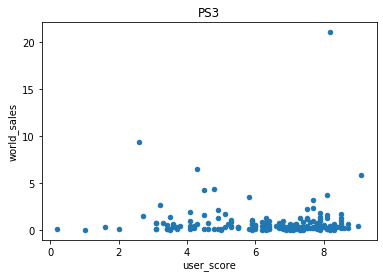

In [ ]:
ps3_sales_crit_user_rating.plot(x='user_score', y='world_sales', kind='scatter', title='PS3')
plt.show()

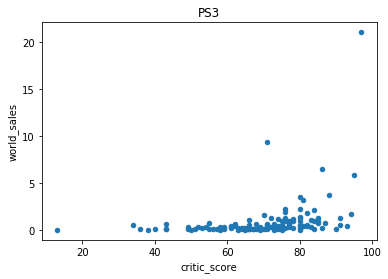

In [ ]:
ps3_sales_crit_user_rating.plot(x='critic_score', y='world_sales', kind='scatter', title='PS3')
plt.show()

In [ ]:
x_one_sales_crit_user_rating = games_sales_x_one.loc[:,['world_sales', 'critic_score', 'user_score']]
x_one_sales_crit_user_rating.head()

,world_sales,critic_score,user_score
99,7.39,NaN,NaN
165,5.47,97.0,7.9
179,5.26,81.0,5.4
242,4.49,84.0,6.4
270,4.22,88.0,6.2


In [ ]:
x_one_sales_crit_user_rating.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.415034,-0.063612
critic_score,0.415034,1.000000,0.472595
user_score,-0.063612,0.472595,1.000000


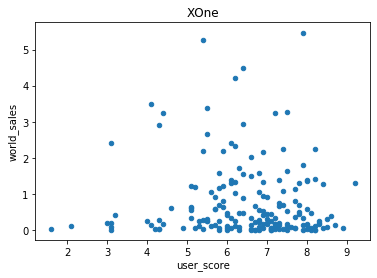

In [ ]:
x_one_sales_crit_user_rating.plot(x='user_score', y='world_sales', kind='scatter', title='XOne')
plt.show()

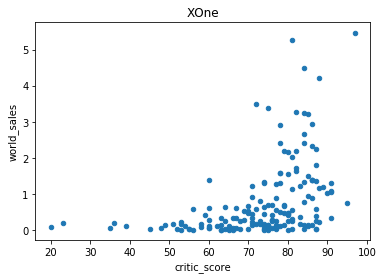

In [ ]:
x_one_sales_crit_user_rating.plot(x='critic_score', y='world_sales', kind='scatter', title='XOne')
plt.show()

In [ ]:
ds3_sales_crit_user_rating = games_sales_3ds.loc[:,['world_sales', 'critic_score', 'user_score']]
ds3_sales_crit_user_rating.head()

,world_sales,critic_score,user_score
33,14.60,NaN,NaN
47,11.68,NaN,NaN
96,7.55,NaN,NaN
108,7.14,NaN,NaN
184,5.22,NaN,NaN


In [ ]:
ds3_sales_crit_user_rating.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


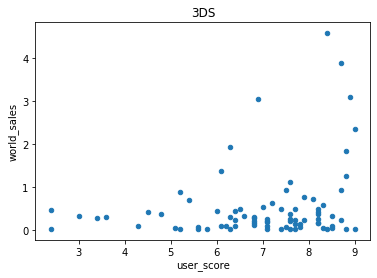

In [ ]:
ds3_sales_crit_user_rating.plot(x='user_score', y='world_sales', kind='scatter', title='3DS')
plt.show()

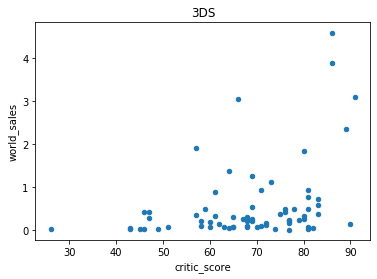

In [ ]:
ds3_sales_crit_user_rating.plot(x='critic_score', y='world_sales', kind='scatter', title='3DS')
plt.show()

In [ ]:
x360_sales_crit_user_rating = games_sales_x360.loc[:,['world_sales', 'critic_score', 'user_score']]
x360_sales_crit_user_rating.head()

,world_sales,critic_score,user_score
23,16.27,97.0,8.1
60,10.24,73.0,2.6
72,9.18,NaN,NaN
263,4.28,NaN,4.9
271,4.22,84.0,4.2


In [ ]:
x360_sales_crit_user_rating.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.349323,-0.013848
critic_score,0.349323,1.000000,0.543429
user_score,-0.013848,0.543429,1.000000


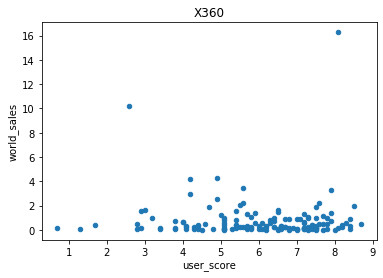

In [ ]:
x360_sales_crit_user_rating.plot(x='user_score', y='world_sales', kind='scatter', title='X360')
plt.show()

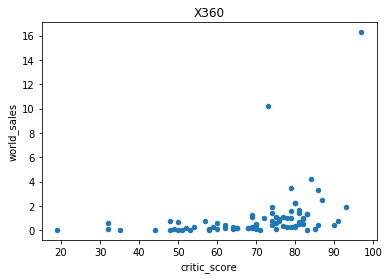

In [ ]:
x360_sales_crit_user_rating.plot(x='critic_score', y='world_sales', kind='scatter', title='X360')
plt.show()

<div class="alert alert-info">
<font size="5"><b></b></font> 
    
У всех платформ присутствуем корреляция, между оценками критиков и продажами.
Оценка пользователей слабо влияет на продажи. Покупатели прислушиваются больше к критикам, чем к оценкам других пользователей.
    
    
    
</div>

##### •	Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [ ]:
genre_pivot_table = pd.pivot_table(relevant_games, index='genre', values='world_sales', aggfunc='sum')
genre_pivot_table.sort_values('world_sales', ascending=False)

,world_sales
genre,
Action,315.45
Shooter,232.10
Sports,150.55
Role-Playing,127.35
Misc,62.76
Platform,40.73
Racing,39.61
Fighting,34.69
Adventure,22.60


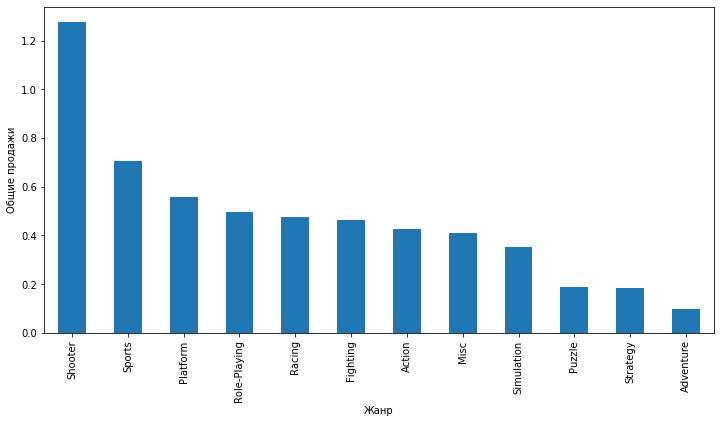

In [ ]:
(relevant_games.pivot_table(index='genre', values='world_sales')
.sort_values('world_sales', ascending=False)
.plot(kind='bar', y='world_sales', figsize=(12, 6), legend=False)
.set(xlabel='Жанр', ylabel='Общие продажи'))

plt.show()

###### Самым прибыльным жанром по миру является шутер. Жанр, приносящий прибыль меньше всех является квест.

##### Определите для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясните разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
def regional_top5(column, region):
    return relevant_games.pivot_table(index=column, values=region, aggfunc='sum').sort_values(by=region, ascending=False).head()

In [ ]:
def regional_pie_of_sales(df, name, region):
    (df.plot.pie(
        y=region, 
        legend=False, 
        pctdistance=1.1, 
        labeldistance=1.2, 
        autopct='%1.0f%%', 
        figsize=(12,6), title=name))
    plt.show()

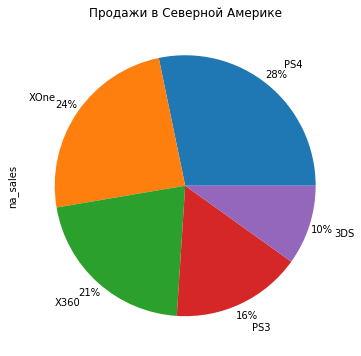

In [ ]:
regional_pie_of_sales(regional_top5('platform', 'na_sales'), 'Продажи в Северной Америке', 'na_sales')

Самой популярной консолью в Северной Америке является PS4 - 28%.

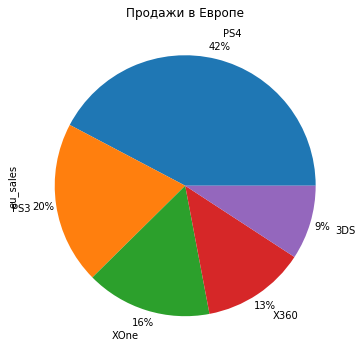

In [ ]:
regional_pie_of_sales(regional_top5('platform', 'eu_sales'), 'Продажи в Европе', 'eu_sales')

В Европе более популярна консоль от PS4

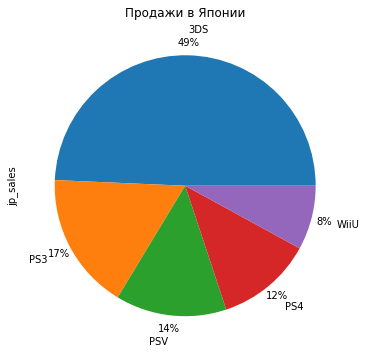

In [ ]:
regional_pie_of_sales(regional_top5('platform', 'jp_sales'), 'Продажи в Японии', 'jp_sales')

В Японии местные жители отдают преподчтения консолям отечественных компаний.

###### 5 популярных жанров видеоигр в каждом регионе

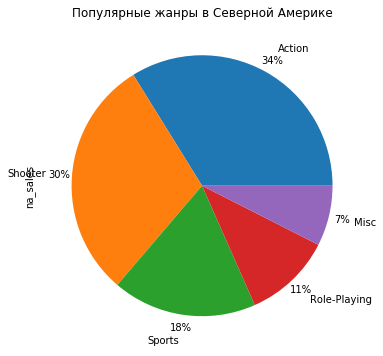

In [ ]:
regional_pie_of_sales(regional_top5('genre', 'na_sales'), 'Популярные жанры в Северной Америке', 'na_sales')

Самым популярным жанром в Северной Америке является action

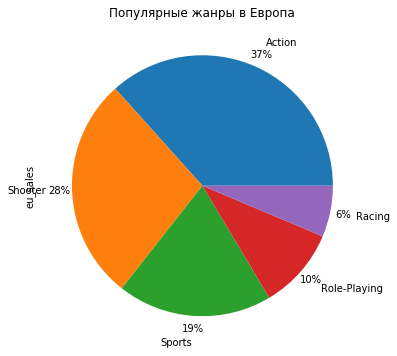

In [ ]:
regional_pie_of_sales(regional_top5('genre', 'eu_sales'), 'Популярные жанры в Европа', 'eu_sales')

В Европе тоже самым популярным жанром остался action.

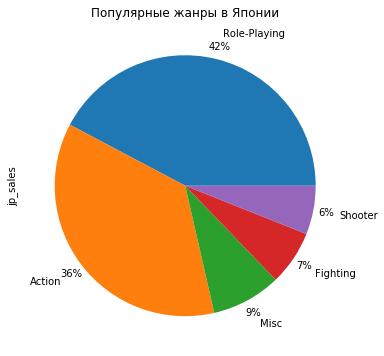

In [ ]:
regional_pie_of_sales(regional_top5('genre', 'jp_sales'), 'Популярные жанры в Японии', 'jp_sales')

В Японии уже самым продаваемым жанром стал Role-Playing

##### • Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
esrb_sale = data_games.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='na_sales',
                                                                                      ascending=False).reset_index()
esrb_sale

,rating,na_sales,eu_sales,jp_sales
0,E,1274.24,703.87,197.96
1,T,747.60,421.79,150.70
2,M,742.89,480.00,63.58
3,E10+,345.50,183.35,40.20
4,K-A,2.56,0.27,1.46
5,EC,1.53,0.11,0.00
6,AO,1.26,0.61,0.00
7,RP,0.00,0.03,0.00


<div class="alert alert-info">
<font size="5"><b></b></font> 
    
заменим пропуски в столбце 'rating' на «RP» («Rating Pending») — «Рейтинг ожидается»
    
    
    
</div>

In [ ]:
data_games['rating'] = data_games['rating'].fillna('RP')

In [ ]:
esrb_sale_new = data_games.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='na_sales',
                                                                                      ascending=False).reset_index()
esrb_sale_new

,rating,na_sales,eu_sales,jp_sales
0,E,1274.24,703.87,197.96
1,RP,1227.62,610.21,836.77
2,T,747.60,421.79,150.70
3,M,742.89,480.00,63.58
4,E10+,345.50,183.35,40.20
5,K-A,2.56,0.27,1.46
6,EC,1.53,0.11,0.00
7,AO,1.26,0.61,0.00


<div class="alert alert-info">
<font size="5"><b></b></font> 
    
Теперь игры без рейтинга мы не потеряем. Они заняли второе место по продажам)
       
    
</div>

   - «E» («Everyone») — «Для всех»
   - «T» («Teen») — «Подросткам»
   - «M» («Mature») — «Для взрослых»
   - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

   - «EC»(«K-A» - в ранних версиях с 1994-1997 годы) («Early childhood») — «Для детей младшего возраста»
   - «AO» («Adults Only 18+») — «Только для взрослых»
   - «RP» («Rating Pending») — «Рейтинг ожидается»

#### Вывод: 4 основных рейтинга: «E»,«T»,«M» и «E10+». Влияние рейтинга на продажи в разных регионах почти одинаково. На первом месте «E» и далее «T», «M» и «E10+», исключение Европа, где продажи с рейтингом «M» на 13% больше, чем с «T». Доли этих рейтингов в своем регионе тоже примерно одинаковы.

### Шаг 5. Проверьте гипотезы

###### •	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H₀ всегда формулируется так, чтобы использовать знак равенства, поэтому нулевую гипотезу сформулируем как по заданию: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; тогда альтернативная гипотеза H₁ - Средние пользовательские рейтинги платформ Xbox One и PC различны.

In [ ]:
pc = relevant_games[relevant_games['platform'] == 'PC'] 
x_one = relevant_games[relevant_games['platform'] == 'XOne']

alpha = .05
results = st.ttest_ind(pc['user_score'], x_one['user_score'], nan_policy='omit')
print('значение p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем Нулевую гипотезу')
else:
    print('Не получилось отвергнуть Нулевую гипотезу')

значение p-value:  0.15306319055798
Не получилось отвергнуть Нулевую гипотезу


###### Вывод: Значение p-value равно чуть больше 15%. Таким образом, не получилось отвергнуть Нулевую гипотезу. 

###### •	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H₀ всегда формулируется так, чтобы использовать знак равенства, нулевую гипотезу сформулируем так: Средние пользовательские рейтинги жанров Action и Sports равны; альтернативная гипотеза H₁ тогда будет - Средние пользовательские рейтинги жанров Action и Sports разные (как в задании)

In [ ]:
action = relevant_games[relevant_games['genre'] == 'Action'] 
sports = relevant_games[relevant_games['genre'] == 'Sports']

alpha = .05
results = st.ttest_ind(action['user_score'], sports['user_score'], nan_policy='omit')
print('значение p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем Нулевую гипотезу')
else:
    print('Не получилось отвергнуть Нулевую гипотезу')

значение p-value:  6.406039298730121e-27
Отвергаем Нулевую гипотезу


###### Вывод: Получив p-value, мы отвергли Нулевую гипотезу. Средние пользовательские рейтинги различаются.

### Шаг 6. Общий вывод

1.Изучили основную информацию о датасете.

2.Выявили пропуски в столбце year_of_release, Множество пропусков в столбцах оценок от критиков и игроков: critic_score и user_score. Измеили формат данных.

3.В столбце оценок от игроков user_score значения tbd, заменили значениями NAN.

4.Заменили названия столбцов в датасете(привели к нижнему регистру).

5.Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

6.Выяснили, что с 1980 года до 1993 выпускалось довольно мало игр, а после 1993 года начался рост вплоть до 2008 года. Затем был спад до 2013.

7.Выяснили, что срок активного существования платформ 9-10 лет.

8 Выделили Топ 5 платформ по миру: PS4, PS3, XOne, 3DS и X360. Для PS4, PS3 и 3DS видна положительная тенденция к росту продаж.

9.Выяснили,что нет взаимосвязи между оценками игроков и продажами. И что высокая оценка критиков не гарантирует высокие продажи.

10.Также выяснили, что самым прибыльным жанром по миру является шутер.

11.Определили, что:
    Самой популярной консолью в Северной Америке является PS4 - 28%;
    Самой популярной консолью в Европе является PS4 - 42%;
    Самой популярной консолью в Японии является 3DS - 49%;
    Самым популярным жанром в Северной Америке является action - 34%;
    Самым популярным жанром в Европе является action - 37%;
    Самым популярным жанром в Японии является Role-Playing - 42%.
    
12.Выяснили, что влияние рейтинга на продажи в разных регионах почти одинаково. На первом месте «E» и далее «T», «M» и «E10+», исключение Европа, где продажи с рейтингом «M» на 13% больше, чем с «T».

13.Проверили гипотезы:

     •Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
     •Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Обе гипотезы не отвергнуты.
    
    